In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

In [ ]:
csv_path='/content/drive/MyDrive/DOHMH_New_York_City_Restaurant_Inspection_Results_20240104 (1).csv'
df = pd.read_csv(csv_path)

In [ ]:
df.tail()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
211683,50111580,MAMA GANOUSH,Manhattan,638,LEXINGTON AVENUE,10022.0,9173883816,Mediterranean,04/06/2023,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.759138,-73.970440,105.0,4.0,10000.0,1071461.0,1.013098e+09,MN19,NaN
211684,50009233,HASHI RAMEN & IZAKAYA,Queens,19212,NORTHERN BLVD,11358.0,7182242961,Japanese,02/06/2018,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.757837,-73.789206,411.0,19.0,142900.0,4124423.0,4.055160e+09,QN48,NaN
211685,50008955,AZASU,Manhattan,49,CLINTON STREET,10002.0,2127777069,Japanese,04/27/2023,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.719737,-73.984744,103.0,1.0,3001.0,1004226.0,1.003490e+09,MN27,NaN
211686,50065695,MR. Q'S,Bronx,2115,WILLIAMSBRIDGE ROAD,10461.0,7188232424,Chinese,06/26/2023,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.855801,-73.855547,211.0,13.0,24800.0,2049704.0,2.043320e+09,BX49,NaN
211687,50076453,99C PIZZA,Manhattan,150,EAST BROADWAY,10002.0,3472133313,Pizza,03/13/2023,Violations were cited in the following area(s).,...,Administrative Miscellaneous / Initial Inspection,40.713998,-73.990848,103.0,1.0,600.0,1003593.0,1.002830e+09,MN28,NaN


In [ ]:
df.isnull().sum()

CAMIS                         0
DBA                         673
BORO                          0
BUILDING                    296
STREET                        3
ZIPCODE                    2688
PHONE                         2
CUISINE DESCRIPTION        2460
INSPECTION DATE               0
ACTION                     2460
VIOLATION CODE             3589
VIOLATION DESCRIPTION      3589
CRITICAL FLAG                 0
SCORE                     10177
GRADE                    108310
GRADE DATE               117084
RECORD DATE                   0
INSPECTION TYPE            2460
Latitude                    280
Longitude                   280
Community Board            3216
Council District           3216
Census Tract               3216
BIN                        4228
BBL                         531
NTA                        3216
Location Point1          211688
dtype: int64

**Calculate the percentage of missing values in each column**


In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({ 'Column': df.columns, 'Missing Percentage': missing_percentage})
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)
missing_info

,Column,Missing Percentage
Location Point1,Location Point1,100.000000
GRADE DATE,GRADE DATE,55.309701
GRADE,GRADE,51.164922
SCORE,SCORE,4.807547
BIN,BIN,1.997279
VIOLATION CODE,VIOLATION CODE,1.695420
VIOLATION DESCRIPTION,VIOLATION DESCRIPTION,1.695420
Council District,Council District,1.519217
Community Board,Community Board,1.519217
NTA,NTA,1.519217


**Drop columns**

In [ ]:
columns_to_drop = ['BUILDING', 'PHONE', 'CUISINE DESCRIPTION', 'STREET','ZIPCODE', 'Latitude', 'Longitude', 'Community Board', 'Council District','Census Tract','BIN','BBL','NTA','Location Point1']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

**Drop rows with date 1900-01-01 (non isnpected restaurants)**


---


**Drop NaN Values ( except 'GRADE DATE', 'GRADE', 'SCORE', for further analysis)**

In [ ]:
df_cleaned = df_cleaned[df_cleaned['INSPECTION DATE'] != '1900-01-01']
df_cleaned.reset_index(drop=True, inplace=True)
columns_to_exclude = ['GRADE DATE', 'GRADE', 'SCORE']
df_cleaned_nan = df_cleaned.dropna(subset=df_cleaned.columns.difference(columns_to_exclude))
df_cleaned_nan.reset_index(drop=True, inplace=True)
df_cleaned_nan.isnull().sum()


CAMIS                         0
DBA                           0
BORO                          0
INSPECTION DATE               0
ACTION                        0
VIOLATION CODE                0
VIOLATION DESCRIPTION         0
CRITICAL FLAG                 0
SCORE                      7215
GRADE                    105165
GRADE DATE               113906
RECORD DATE                   0
INSPECTION TYPE               0
dtype: int64

**Fill the NaN values with 'W' in the GRADE column to identify inspected restaurants without a GRADE.**

In [ ]:
df_cleaned_nan['GRADE'].fillna('W', inplace=True)

<ipython-input-8-fe53b04b9bce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_nan['GRADE'].fillna('W', inplace=True)


**Create a new column, 'Inspection Frequency,' to count how many times a restaurant (CAMIS) has had an inspection:**

In [ ]:
inspection_counts = df_cleaned_nan['CAMIS'].value_counts()
df_cleaned_nan.loc[:, 'Inspection Frequency'] = df_cleaned_nan['CAMIS'].map(inspection_counts).copy()

<ipython-input-9-bce011af46c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_nan.loc[:, 'Inspection Frequency'] = df_cleaned_nan['CAMIS'].map(inspection_counts).copy()


In [ ]:
inspection_counts.describe()

count    25958.000000
mean         8.016758
std          5.706028
min          1.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         65.000000
Name: CAMIS, dtype: float64

***Filter INSPECTION DATE last 3 Years and extract year to creat new column YEAR***

In [ ]:
df_cleaned_nan['INSPECTION DATE'] = pd.to_datetime(df_cleaned_nan['INSPECTION DATE'], errors='coerce')
df_cleaned_nan['Year'] = df_cleaned_nan['INSPECTION DATE'].dt.year
filtered_years = df_cleaned_nan[df_cleaned_nan['Year'].isin([2021, 2022, 2023])]

<ipython-input-11-b3669e59401b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_nan['INSPECTION DATE'] = pd.to_datetime(df_cleaned_nan['INSPECTION DATE'], errors='coerce')
<ipython-input-11-b3669e59401b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_nan['Year'] = df_cleaned_nan['INSPECTION DATE'].dt.year


In [ ]:
df_cleaned_nan['INSPECTION DATE'] = pd.to_datetime(df_cleaned_nan['INSPECTION DATE'], errors='coerce')
df_cleaned_nan['Year'] = df_cleaned_nan['INSPECTION DATE'].dt.year
filtered_years = df_cleaned_nan[df_cleaned_nan['Year'].isin([2021, 2022, 2023])]
filtered_data = filtered_years[(df_cleaned_nan['GRADE'] == 'W') & (df_cleaned_nan['INSPECTION TYPE'] == 'Cycle Inspection / Initial Inspection')]


<ipython-input-12-b7fd9eb9d37f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_nan['INSPECTION DATE'] = pd.to_datetime(df_cleaned_nan['INSPECTION DATE'], errors='coerce')
<ipython-input-12-b7fd9eb9d37f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_nan['Year'] = df_cleaned_nan['INSPECTION DATE'].dt.year
<ipython-input-12-b7fd9eb9d37f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_years[


In [ ]:
filtered_data.describe()

,CAMIS,SCORE,Inspection Frequency,Year
count,6.597500e+04,65975.000000,65975.000000,65975.000000
mean,4.696152e+07,29.145722,13.794559,2022.249670
std,4.252666e+06,17.317816,6.945157,0.632453
min,3.007544e+07,0.000000,2.000000,2021.000000
25%,4.153665e+07,20.000000,9.000000,2022.000000
50%,5.004465e+07,26.000000,12.000000,2022.000000
75%,5.008688e+07,37.000000,17.000000,2023.000000
max,5.013705e+07,145.000000,59.000000,2023.000000


**Create a visualization of the top 10 violations in the last 3 years for first-time inspected restaurants to identify any recurring violations in restaurants that have not received a grade.**



<ipython-input-46-da9f165c9027>:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


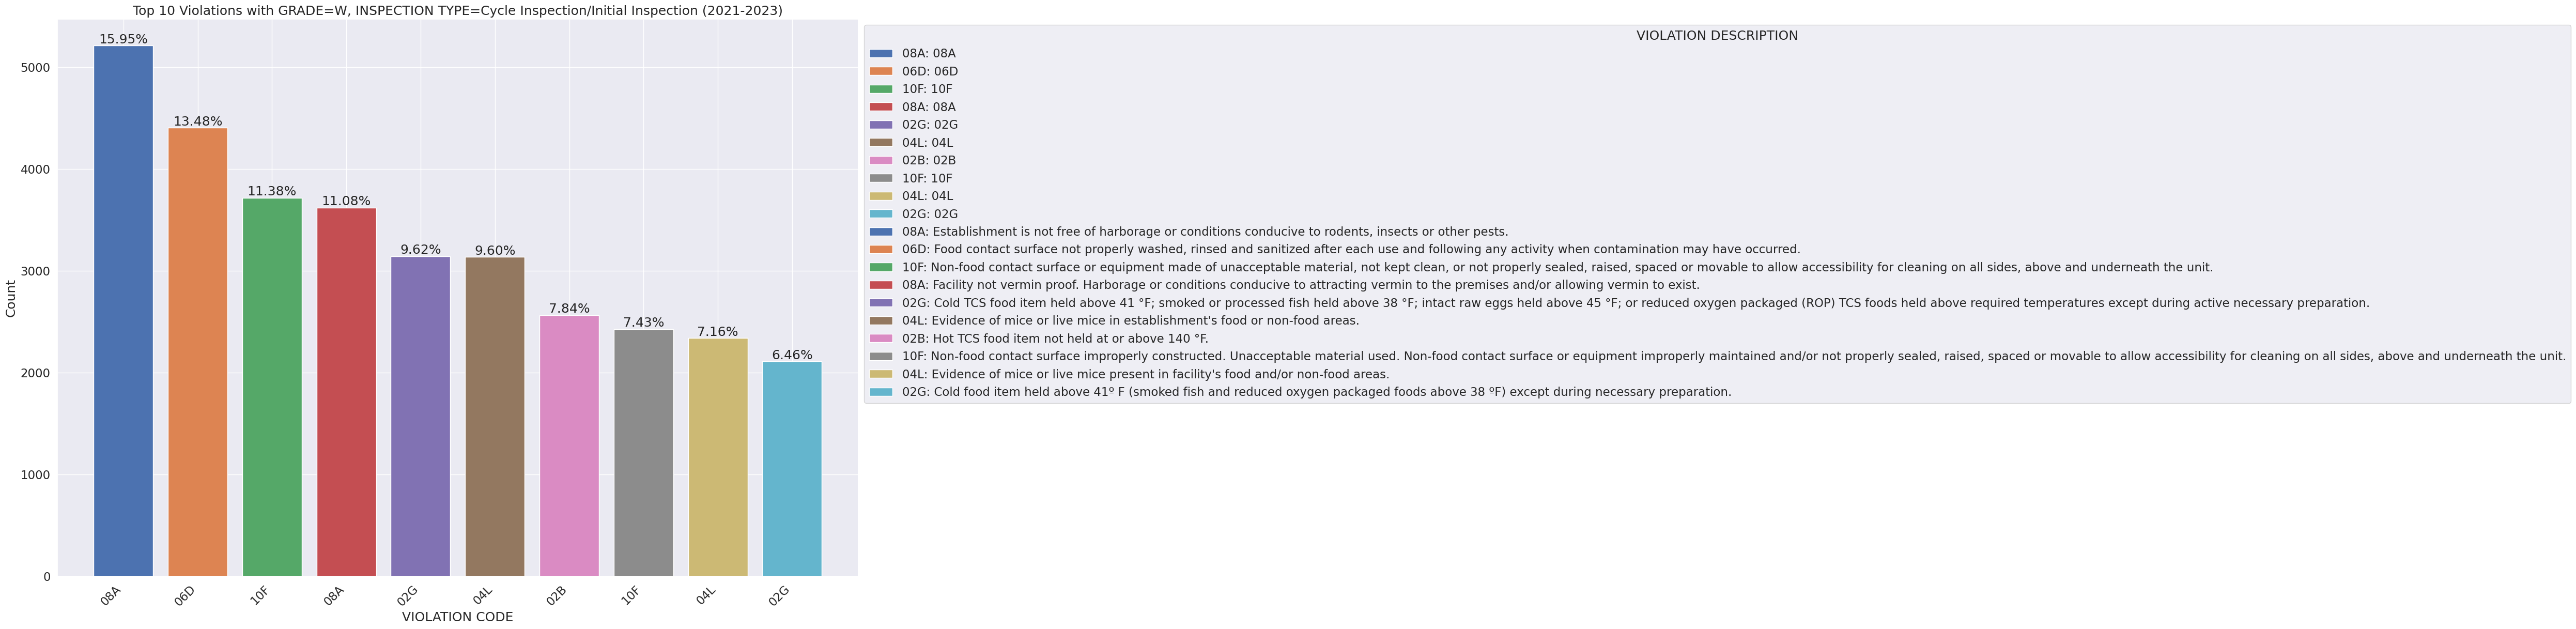

In [ ]:
top_violations = violation_counts.head(10)
plt.figure(figsize=(20, 14))
for i, violation in enumerate(top_violations['VIOLATION CODE']):
    count = top_violations['Count'].iloc[i]
    plt.bar(x=i, height=count, label=f"{violation}: {top_violations['VIOLATION CODE'].iloc[i]}")
    plt.text(i, count + 0.5, f'{count / top_violations["Count"].sum() * 100:.2f}%', ha='center', va='bottom')
for i, violation in enumerate(top_violations['VIOLATION CODE']): plt.bar( x=i , height=top_violations['Count'].iloc[i], label=f"{violation}: {top_violations['VIOLATION DESCRIPTION'].iloc[i]}", )
plt.xticks(np.arange(len(top_violations['VIOLATION CODE'])), top_violations['VIOLATION CODE'], rotation=45, ha='right')
plt.title('Top 10 Violations with GRADE=W, INSPECTION TYPE=Cycle Inspection/Initial Inspection (2021-2023)')
plt.xlabel('VIOLATION CODE')
plt.ylabel('Count')
plt.legend(title='VIOLATION DESCRIPTION', bbox_to_anchor=(1, 1), loc='best')
plt.tight_layout()
plt.show()




**Create a visualization of the percentage of re-inspected restaurants receiving a grade.**


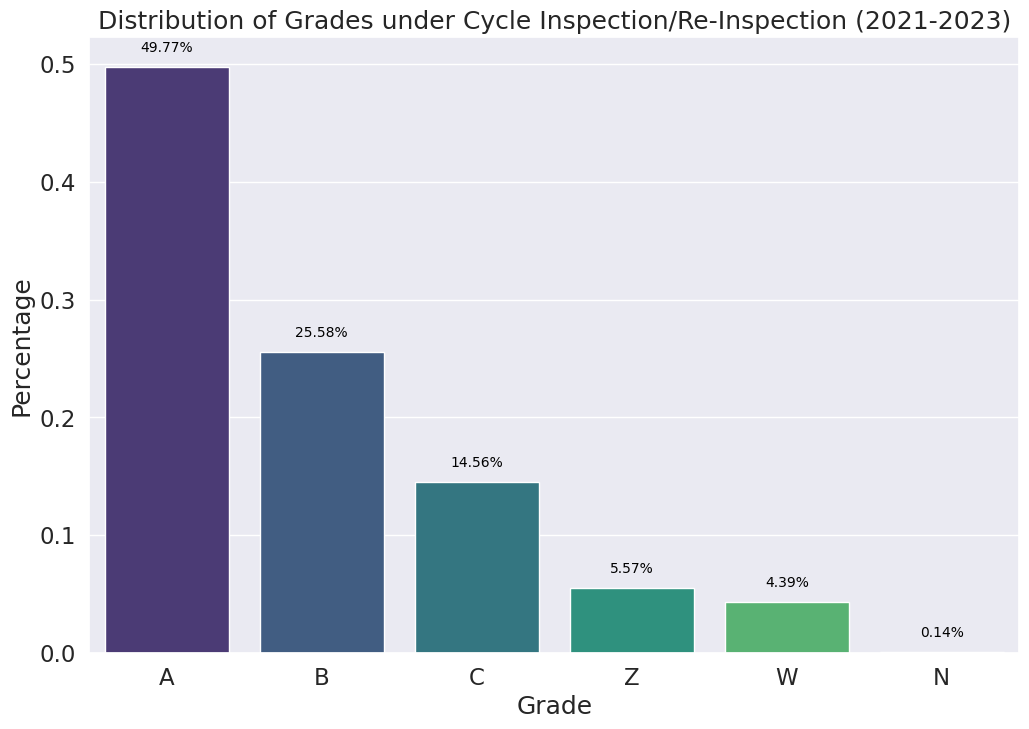

In [ ]:
cycle_re_inspection_data = df_cleaned_nan[(df_cleaned_nan['INSPECTION TYPE'] == 'Cycle Inspection / Re-inspection') &(df_cleaned_nan['Year'].isin([2021, 2022, 2023]))]
grade_counts_cycle_re_inspection = cycle_re_inspection_data['GRADE'].value_counts(normalize=True).reset_index()
grade_counts_cycle_re_inspection.columns = ['Grade', 'Percentage']
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Grade', y='Percentage', data=grade_counts_cycle_re_inspection, palette='viridis')
plt.title('Distribution of Grades under Cycle Inspection/Re-Inspection (2021-2023)')
plt.xlabel('Grade')
plt.ylabel('Percentage')
for i, percentage in enumerate(grade_counts_cycle_re_inspection['Percentage']):
    ax.text(i, percentage + 0.01, f'{percentage:.2%}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()


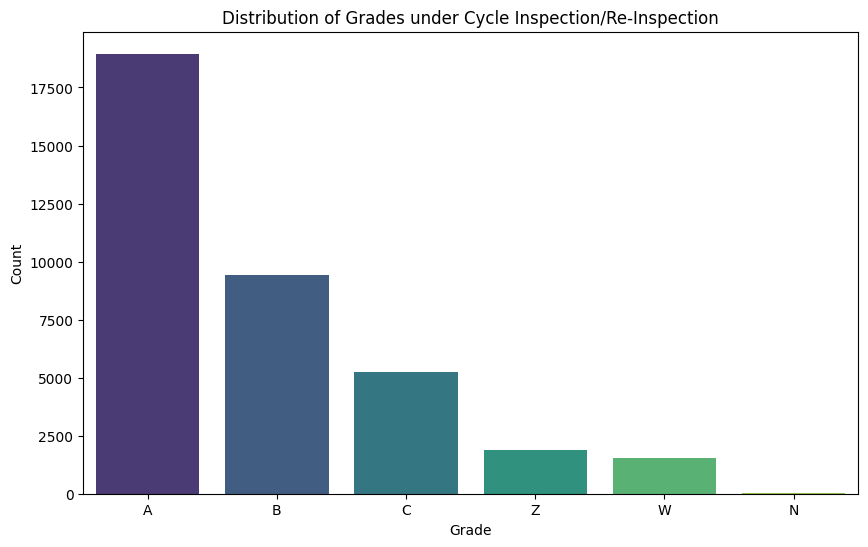

In [ ]:
cycle_re_inspection_data = df_cleaned_nan[df_cleaned_nan['INSPECTION TYPE'] == 'Cycle Inspection / Re-inspection']
grade_counts_cycle_re_inspection = cycle_re_inspection_data['GRADE'].value_counts().reset_index()
grade_counts_cycle_re_inspection.columns = ['Grade', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Grade', y='Count', data=grade_counts_cycle_re_inspection, palette='viridis')
plt.title('Distribution of Grades under Cycle Inspection/Re-Inspection')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


**Count each Grade by Year**

In [ ]:
cycle_re_inspection_data = df_cleaned_nan[(df_cleaned_nan['INSPECTION TYPE'] == 'Cycle Inspection / Re-inspection') & (df_cleaned_nan['Year'].isin([2021, 2022, 2023]))]
grade_counts_by_year = cycle_re_inspection_data.groupby(['Year', 'GRADE']).size().reset_index(name='Count')
print(grade_counts_by_year)


    Year GRADE  Count
0   2021     A    414
1   2021     B    147
2   2021     C     77
3   2021     W     23
4   2022     A   8946
5   2022     B   3957
6   2022     C   2213
7   2022     N     21
8   2022     W    686
9   2022     Z    239
10  2023     A   7311
11  2023     B   4466
12  2023     C   2588
13  2023     N     25
14  2023     W    760
15  2023     Z   1626


**Create a plot of the distributions over the last 3 years for re-inspected assigned restaurants.**

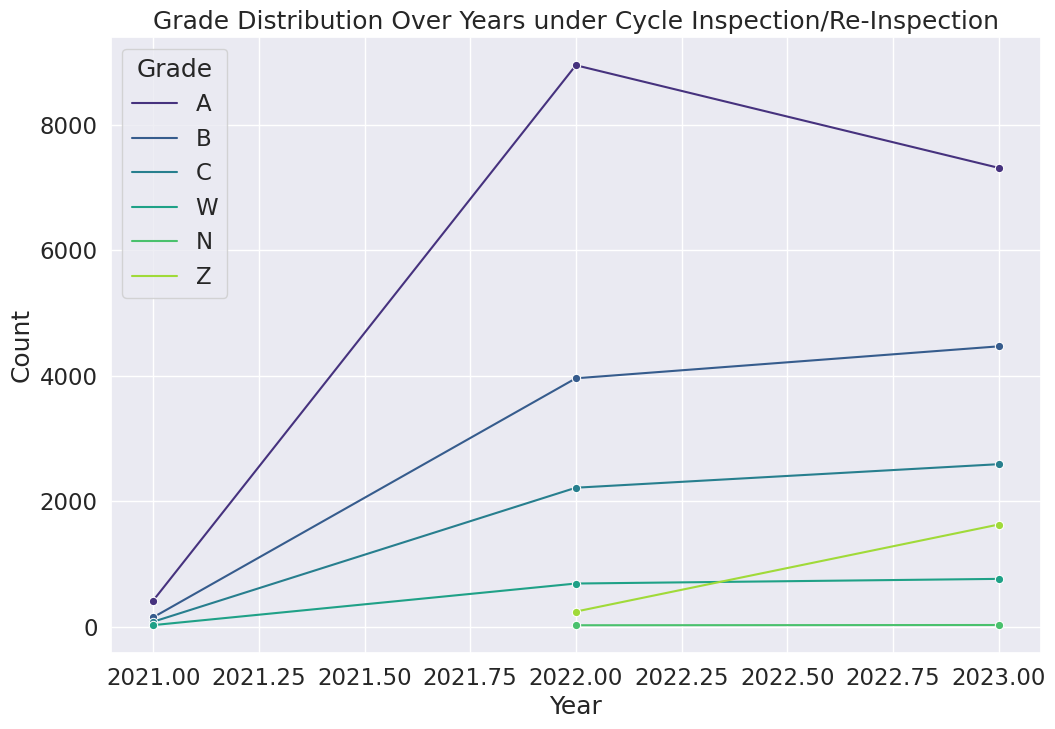

In [ ]:
cycle_re_inspection_data = df_cleaned_nan[(df_cleaned_nan['INSPECTION TYPE'] == 'Cycle Inspection / Re-inspection') &(df_cleaned_nan['Year'].isin([2021, 2022, 2023]))]
grade_counts_by_year = cycle_re_inspection_data.groupby(['Year', 'GRADE']).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Count', hue='GRADE', data=grade_counts_by_year, marker='o', palette='viridis')
plt.title('Grade Distribution Over Years under Cycle Inspection/Re-Inspection')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Grade')
plt.show()


**Filter the DataFrame for 'Cycle Inspection/Initial Inspection' and 'GRADE=W' to count initial inspection restaurants without receiving a grade by year.**

In [ ]:
filtered_cycle_initial_inspection_data = df_cleaned_nan[(df_cleaned_nan['INSPECTION TYPE'] == 'Cycle Inspection / Initial Inspection') & (df_cleaned_nan['GRADE'] == 'W') & (df_cleaned_nan['Year'].isin([2021, 2022, 2023]))]
violation_description_stats_initial_inspection = filtered_cycle_initial_inspection_data.groupby('Year')['VIOLATION CODE'].agg(['count', 'nunique']).reset_index()
violation_description_stats_initial_inspection.columns = ['Year', 'Count', 'Unique Violation Codes']

print(violation_description_stats_initial_inspection)


   Year  Count  Unique Violation Codes
0  2021   7015                      50
1  2022  35473                      68
2  2023  23487                      66


In [ ]:
filtered_cycle_initial_inspection_data

,CAMIS,DBA,BORO,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Inspection Frequency,Year
6,50069376,QINGDAO,Queens,2023-10-30,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,31.0,W,NaN,01/03/2024,Cycle Inspection / Initial Inspection,18,2023
7,41232504,FIG & OLIVE,Manhattan,2022-03-23,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,0.0,W,NaN,01/03/2024,Cycle Inspection / Initial Inspection,10,2022
10,50099743,DIG INN,Manhattan,2022-08-16,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,14.0,W,NaN,01/03/2024,Cycle Inspection / Initial Inspection,7,2022
11,50096535,PHO SHOP,Manhattan,2022-08-09,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,29.0,W,NaN,01/03/2024,Cycle Inspection / Initial Inspection,7,2022
12,50099527,G & S,Bronx,2022-09-14,Violations were cited in the following area(s).,04L,Evidence of mice or live mice in establishment...,Critical,66.0,W,NaN,01/03/2024,Cycle Inspection / Initial Inspection,18,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208082,50118257,BAYA BAR,Queens,2023-05-23,Violations were cited in the following area(s).,09C,"Design, construction, materials used or mainte...",Not Critical,27.0,W,NaN,01/03/2024,Cycle Inspection / Initial Inspection,7,2023
208083,40785565,BILLYMARKS WEST,Manhattan,2023-11-16,Violations were cited in the following area(s).,08C,Pesticide not properly labeled or used by unli...,Not Critical,18.0,W,NaN,01/03/2024,Cycle Inspection / Initial Inspection,23,2023
208084,50101751,PHO GRAND COUNTER,Manhattan,2022-10-26,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,26.0,W,NaN,01/03/2024,Cycle Inspection / Initial Inspection,13,2022
208087,41621699,MI PASO CENTRO AMERICANO RESTAURANT,Manhattan,2023-05-04,Establishment Closed by DOHMH. Violations were...,04M,Live roaches in facility's food or non-food area.,Critical,65.0,W,NaN,01/03/2024,Cycle Inspection / Initial Inspection,24,2023


In [ ]:
filtered_cycle_initial_inspection_data.count()

CAMIS                    65975
DBA                      65975
BORO                     65975
INSPECTION DATE          65975
ACTION                   65975
VIOLATION CODE           65975
VIOLATION DESCRIPTION    65975
CRITICAL FLAG            65975
SCORE                    65975
GRADE                    65975
GRADE DATE                   0
RECORD DATE              65975
INSPECTION TYPE          65975
Inspection Frequency     65975
Year                     65975
dtype: int64

In [ ]:
filtered_data_cycle_initial_w = df_cleaned_nan[(df_cleaned_nan['INSPECTION TYPE'] == 'Cycle Inspection / Initial Inspection') & (df_cleaned_nan['GRADE'] == 'W') & (df_cleaned_nan['Year'].isin([2021, 2022, 2023]))]
count_and_average_cycle_initial_w = filtered_data_cycle_initial_w.groupby('Year')['CAMIS'].agg(['count', 'mean']).reset_index()
count_and_average_cycle_initial_w.columns = ['Year', 'Count', 'Average']
print(count_and_average_cycle_initial_w)


   Year  Count       Average
0  2021   7015  4.528847e+07
1  2022  35473  4.713730e+07
2  2023  23487  4.719573e+07


In [ ]:
filtered_data_cycle_initial_last_3_years = df_cleaned_nan[(df_cleaned_nan['INSPECTION TYPE'] == 'Cycle Inspection / Initial Inspection') & (df_cleaned_nan['Year'].isin([2021, 2022, 2023]))]count_cycle_initial_last_3_years = len(filtered_data_cycle_initial_last_3_years)
print("Count of inspections with 'Cycle Inspection/Initial Inspection' in the last 3 years:", count_cycle_initial_last_3_years)


Count of inspections with 'Cycle Inspection/Initial Inspection' in the last 3 years: 104266


In [ ]:
count_cycle_initial_last_3_years

104266

**Count the number and percentage of initial inspection restaurants without receiving a grade by year.**


In [ ]:
filtered_data_cycle_initial_last_3_years = df_cleaned_nan[(df_cleaned_nan['INSPECTION TYPE'] == 'Cycle Inspection / Initial Inspection') & (df_cleaned_nan['Year'].isin([2021, 2022, 2023]))] result_table = (filtered_data_cycle_initial_last_3_years.groupby('Year')['GRADE'].value_counts(normalize=True).unstack(fill_value=0).multiply(100).reset_index())
print(result_table)


GRADE  Year          A        B         N          W
0      2021  35.195273  0.00000  0.036931  64.767796
1      2022  31.319872  0.00767  0.650060  68.022397
2      2023  36.491789  0.00000  6.619677  56.888534


In [ ]:
filtered_data_cycle_initial = df_cleaned_nan[df_cleaned_nan['INSPECTION TYPE'] == 'Cycle Inspection / Initial Inspection']
filtered_data_cycle_re_inspection = df_cleaned_nan[df_cleaned_nan['INSPECTION TYPE'] == 'Cycle Inspection / Re-inspection']
count_cycle_initial_by_year = filtered_data_cycle_initial['Year'].value_counts().sort_index()
count_cycle_re_inspection_by_year = filtered_data_cycle_re_inspection['Year'].value_counts().sort_index()
print(count_cycle_initial_by_year)
print("\nCount by year for 'Cycle Inspection / Re-Inspection':")
print(count_cycle_re_inspection_by_year)


Count by year for 'Cycle Inspection/Initial Inspection':
2015       11
2016      235
2017      832
2018     1011
2019     4093
2020     4233
2021    10831
2022    52149
2023    41286
Name: Year, dtype: int64

Count by year for 'Cycle Inspection / Re-Inspection':
2015        2
2016       60
2017      153
2018      340
2019     1513
2020     1516
2021      661
2022    16062
2023    16776
Name: Year, dtype: int64


**Conclusion**
In our analysis, we explore into the intricacies of the grading system for new restaurants, uncovering key insights that shape their operational trajectory. Here's a breakdown of our findings:

Data Cleaning and Missing Values:
Recognizing the prevalence of missing values, particularly in columns like "grade" and "grade date," we opted for a meticulous cleaning process.
Addressing the absence of grades, we filled NaN values with "W" to facilitate a more comprehensive analysis.

Inspection Frequency:
Introduction of new columns, such as inspection frequency, offered insights into the number of times each restaurant (CAMI) underwent inspections.

Temporal Focus:
We narrowed our focus to the most recent three years (2021, 2022, 2023) for a contemporary analysis.

Insights from Initial Inspections:
A significant proportion of missing values in grading results from initial inspections, where new restaurants are not graded on their first visit.

Correlation with Violations:
Exploring the top 10 violations associated with missing grades, we found no clear correlation. The second visualization indicates a 50% chance of receiving an "A" grade upon subsequent inspections.

Complexity of Adjudication:
The adjudication process introduces complexity, influencing grade changes and contributing to a nuanced understanding of compliance.

Impact of Inspection Amount:
While Dunkin' Donuts appeared as one of the most violated establishments, further investigation revealed it to be a common chain in NYC. consequently, the number of inspections alone does not necessarily indicate the severity of violations.

In summary, our analysis indicates that 65-70% of new restaurants undergo re-inspections, with a majority achieving an "A" grade post-reinspection. The grading system is designed to foster improvement and maintain high standards, offering valuable insights for both restaurant owners and regulatory bodies. Understanding these dynamics is pivotal for the continuous enhancement of the food service industry